In [1]:
from __future__ import print_function

import keras
import keras.backend as K
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional
from keras.datasets import imdb
import tensorflow as tf
from tensorflow.python import debug as tf_debug
from random import randint
from keras import metrics

#K.set_session(tf_debug.LocalCLIDebugWrapperSession(tf.Session()))

from keras.models import Sequential
from keras import layers
import numpy as np
from six.moves import range
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
import parser
import matplotlib.pyplot as plt
%matplotlib inline  

Using TensorFlow backend.


In [2]:
def gen_expression(n, well_balanced=True) :
    # make a well formed expression of length n
    p_pairs = [ '()', '{}', '[]']
    pair = p_pairs[randint(0,len(p_pairs)-1)]
    oc, cc = tuple(list(pair))
    if well_balanced :
        c = int(np.random.random() * 3.)
        digit = lambda _ : list("0")[int(randint(0,1))]
        digit = lambda _ : "0" #list("0")[int(np.random.random()*2.)]
        if n <= 2:
            res = ''.join([digit(n) for i in range(n)])
        else :
            if np.random.random() > 0.5 :
                l = randint(1, n-2)
                #l = int((n-2) * np.random.random())+1
                res1 = gen_expression(l, well_balanced)
                res = res1 + "+" + gen_expression(n-len(res1)-1, well_balanced)
                #EKOX((n, l, len(res1), res1, n-len(res1)-1, len(res), res))

                #sys.exit(0)
                
            else :
                res = oc + gen_expression(n-2, well_balanced) + cc
                
    else :
        h = lambda x : list("01()+")[int(np.random.random()*5.)]
        return ''.join([ h(n) for i in range(n)])
    return res

def gen_expression1(n) :
    # variation
    if n <= 2:
         res = '()'
    else :
        if np.random.random() > 0.5 :
            l = randint(1, (n-2)/2)*2
            res1 = gen_expression1(l)
            res = res1 + gen_expression1(n-len(res1))
        else :
            res = '(' + gen_expression1(n-2) + ')'
    return res


e = gen_expression(14)
print(e)

[(0)+({00})]+0


In [3]:
def EKOX(x) :print(x)
    
def disturb(e) :
    ## from a correct expression, makes a wrong one
    #return ''.join(shuffle(e))
    def ccc(c) :
        ef = [n for n in xrange(len(e)) if e.find(c, n) == n]
        i = min(int(np.random.random()*len(ef)), len(ef)-1)
        return ef[i]
    le = list(e)        
    try :
        io, ic = ccc('('), ccc(')')
        le[io] = ')'
        le[ic] = '('
    except Exception as ex:
        pass
    return ''.join(le)


EKOX(e)
EKOX(disturb(e))
#sys.exit(0)


D = 80
X,y = [], []
N = 50000
import sympy

[(0)+({00})]+0
[(0)+){00}(]+0


The number of well balanced parenthised expressions of length D is the number of catalan

In [4]:
EKOX(sympy.functions.combinatorial.numbers.catalan(D))

1136359577947336271931632877004667456667613940


preparing the data

In [5]:
chars = "01+()[]{}"
nchars = len(chars)
EKOX(np.eye(nchars))
table = dict(zip(chars, np.eye(len(chars))))
tablei = dict(zip(map(str, list(np.eye(len(chars)))), chars))
EKOX(table.keys())
EKOX(table.values())
tablemap = lambda x : table[x]

for t in [True, False] :
    for i in range(N) :
        ee = gen_expression(D, True)
        cc = list("()")[int(np.random.random()*2)]
        if not t :
            ee = disturb(ee)
#        EKOX((t, ee))
        g = map(tablemap, list(ee))
        assert(len(g) == D)
            
        X.append(g)
        y.append(t)
EKOX(TYPE(X))
X = np.asarray(X)
EKOX(TYPE(X))
y = np.asarray(y)*1.

dec2 = lambda x : map(str, x)
dec1 = lambda x : tablei[x]
dec = lambda x : ''.join(map(dec1, dec2(x)))

#EKOX(map(dec, X[:10,:,:]))


EKOX(y.mean())
EKOX(TYPE(y))
X, y = shuffle(X, y)
N=X.shape[0]
EKOX(y.mean())
Xtrain, Xval, ytrain, yval = X[N/3:], X[:N/3], y[N/3:], y[:N/3]

EKOX('\n'.join(map(str,zip(ytrain[0:20] > 0.5, map(dec, Xtrain[0:20])))))

EKOX((dec(Xtrain[0]), ytrain[0]))
RNN = layers.LSTM
HIDDEN_SIZE = 128
BATCH_SIZE = 128
LAYERS = 1

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]]
[')', '(', '+', '}', '1', '0', '[', ']', '{']
[array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]), array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])]

list#100000(list#80(ndarray#(9,)(float64)))

ndarray#(100000, 80, 9)(float64)
0.5

ndarray#(100000,)(float64)
0.5


this model with 600 000+ coef gives 95% accuracy
even with more conv/dense layers, more epochs ...

In [6]:
model = Sequential()

model.add(layers.Conv1D(32, 5, input_shape=(D, len(chars))))
model.add(layers.Conv1D(32, 5))
model.add(layers.Conv1D(32, 5))
model.add(layers.Conv1D(32, 5))
model.add(layers.Flatten())


#model.add(RNN(HIDDEN_SIZE, input_shape=(D, len(chars))))
# of the output sequence, decide which character should be chosen.
model.add(layers.Dense(50))
model.add(layers.Dense(500))
model.add(layers.Dense(500))
model.add(layers.Dense(500))
model.add(layers.Dense(1, activation='sigmoid')) # 95%
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 76, 32)            1472      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 72, 32)            5152      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 68, 32)            5152      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 64, 32)            5152      
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                102450    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               25500     
__________

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
hist1 = model.fit(Xtrain, ytrain,
          batch_size=BATCH_SIZE,
          epochs=10,
          validation_split=0.3,
          callbacks = cb)

Train on 46666 samples, validate on 20001 samples
Epoch 1/10
46666/46666 [==============================] - 5s - loss: 0.6044 - acc: 0.6478 - val_loss: 0.6073 - val_acc: 0.6561
Epoch 2/10
46666/46666 [==============================] - 4s - loss: 0.6026 - acc: 0.6492 - val_loss: 0.6020 - val_acc: 0.6552
Epoch 3/10
46666/46666 [==============================] - 5s - loss: 0.6005 - acc: 0.6522 - val_loss: 0.6020 - val_acc: 0.6541
Epoch 4/10
46666/46666 [==============================] - 4s - loss: 0.6006 - acc: 0.6502 - val_loss: 0.5991 - val_acc: 0.6567
Epoch 5/10
46666/46666 [==============================] - 4s - loss: 0.6000 - acc: 0.6520 - val_loss: 0.6105 - val_acc: 0.6611
Epoch 6/10
46666/46666 [==============================] - 4s - loss: 0.6005 - acc: 0.6516 - val_loss: 0.6040 - val_acc: 0.6455
Epoch 7/10
46666/46666 [==============================] - 4s - loss: 0.5987 - acc: 0.6560 - val_loss: 0.5987 - val_acc: 0.6616
Epoch 8/10
46666/46666 [==============================] - 5s 

In [12]:
hist.history

{'acc': [0.62771611018927376,
  0.81926884667992828,
  0.94199202845754937,
  0.98945699226829154,
  0.96976385378211216,
  0.99616423091758455,
  0.99877855397934256,
  0.99710710153002191,
  0.99879998285689797,
  0.99909998715544612],
 'loss': [0.63340232208334757,
  0.3975734114123235,
  0.15707718740507046,
  0.037607589771625691,
  0.10511845589975392,
  0.018340665449515691,
  0.0086340327462057637,
  0.014753299631016806,
  0.0073922589657944683,
  0.0059427309720483405],
 'val_acc': [0.72706364679977864,
  0.89755512228560896,
  0.98890055497225138,
  0.98670066496675168,
  0.99710014499275035,
  0.99840007999600022,
  0.99865006749662522,
  0.99775011249437529,
  0.99895005249737512,
  0.9989000549972501],
 'val_loss': [0.5474790795034995,
  0.25741850260996613,
  0.047619938951166896,
  0.041586645347511886,
  0.015133181798400955,
  0.010253836294711284,
  0.0079616393685607405,
  0.012567073547445556,
  0.006651408722002137,
  0.0060666094109996004]}

with this one 0.9999% , only 3800 coefs.

In [10]:
model = Sequential()
#model.add(layers.SimpleRNN(32, input_shape=(D, len(chars))))
#model.add(LSTM(16, input_shape=(D, len(chars))))
model.add(Bidirectional(LSTM(16), input_shape=(D, len(chars))))
# of the output sequence, decide which character should be chosen.
model.add(layers.Dense(16))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 32)                3328      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 3,873
Trainable params: 3,873
Non-trainable params: 0
_________________________________________________________________


In [11]:
"""
sess = K.get_session()
sess = tf_debug.LocalCLIDebugWrapperSession(sess)
K.set_session(sess)
"""
cb = [
    keras.callbacks.TensorBoard(log_dir='./logs',
                                histogram_freq=0,
                                batch_size=32,
                                write_graph=True,
                                write_grads=True,
                                write_images=True,
                                embeddings_freq=0,
                                embeddings_layer_names=None,
                                embeddings_metadata=None)
]
hist1 = model.fit(Xtrain, ytrain,
          batch_size=BATCH_SIZE,
          epochs=10,
          validation_split=0.3,
          callbacks = cb)

hist

Train on 46666 samples, validate on 20001 samples
Epoch 1/10
46666/46666 [==============================] - 37s - loss: 0.6219 - acc: 0.6425 - val_loss: 0.5095 - val_acc: 0.7642
Epoch 2/10
46666/46666 [==============================] - 36s - loss: 0.3794 - acc: 0.8308 - val_loss: 0.2470 - val_acc: 0.8970
Epoch 3/10
46666/46666 [==============================] - 35s - loss: 0.1302 - acc: 0.9549 - val_loss: 0.0801 - val_acc: 0.9705
Epoch 4/10
46666/46666 [==============================] - 35s - loss: 0.0370 - acc: 0.9906 - val_loss: 0.0289 - val_acc: 0.9921
Epoch 5/10
46666/46666 [==============================] - 35s - loss: 0.0213 - acc: 0.9947 - val_loss: 0.0925 - val_acc: 0.9664
Epoch 6/10
46666/46666 [==============================] - 36s - loss: 0.0333 - acc: 0.9910 - val_loss: 0.0304 - val_acc: 0.9903
Epoch 7/10
46666/46666 [==============================] - 37s - loss: 0.0150 - acc: 0.9963 - val_loss: 0.0105 - val_acc: 0.9979
Epoch 8/10
46666/46666 [==============================

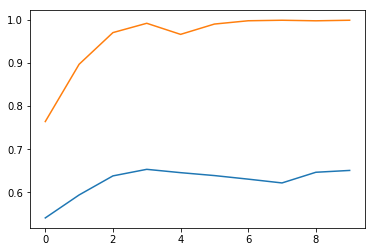

In [12]:
plt.plot(np.arange(10), hist.history['val_acc'], hist1.history['val_acc'])


In [ ]:
p = model.predict(Xval)[:,0]
p = p > 0.5
EKOX(p.shape)
EKOX(TYPE(y))
pyval= yval>0.5
EKOX((p != yval).mean())
diff = (p != pyval)[0:20]
EKOX(np.mean(diff))
EKOX('\n'.join(map(str,zip(p[diff], pyval[diff], map(dec, Xval[diff])))))
EKOX(parser.yacc.parse('0+0'))

EKOX(parser.yacc.parse(map(dec, Xval[diff])[0]))
EKOX(map(dec, Xval[diff])[0])
EKOX(diff)
oa = Xval[diff][0]


EKOX(model.predict(np.asarray([oa])))
EKOX(TYPE(oa))
target          = [[0]]
target_variable = K.variable(target)
loss            = metrics.binary_crossentropy(model.output, target_variable)
gradients       = K.gradients(loss, model.input)
get_grad_values = K.function([model.input], gradients) # symbolic function which compute the gradient on the input image
grad_values     = get_grad_values([[oa]])[0]
EKOX(TYPE(grad_values))
EKOX(grad_values)
EKOX(np.mean(grad_values, axis=2))


target          = [[1]]
target_variable = K.variable(target)
loss            = metrics.binary_crossentropy(model.output, target_variable)
gradients       = K.gradients(loss, model.input)
get_grad_values = K.function([model.input], gradients) # symbolic function which compute the gradient on the input image
grad_values     = get_grad_values([[oa]])[0]
EKOX(TYPE(grad_values))
EKOX(grad_values)
EKOX(np.mean(grad_values, axis=2))